In [32]:
import perceval as pcvl
import perceval.components as comp
import numpy as np

In [126]:
processor = pcvl.Processor("SLOS", 4)

processor.add(0, pcvl.PS(np.pi))
processor.add(1, pcvl.PS(np.pi))
#Initialize at 1
processor.add((1,2), pcvl.PERM([1,0]))
processor.add((2,3), pcvl.BS.Ry(theta = 2*54.74*np.pi/180))
processor.add((0,1), pcvl.BS.Ry(theta = 2*54.74*np.pi/180))
processor.add((1,2), pcvl.PERM([1,0]))
processor.add((0,1), pcvl.BS.Ry(theta = -2*54.74*np.pi/180))
processor.add((2,3), pcvl.BS.Ry(theta = 2*17.63*np.pi/180))
processor.set_postselection(pcvl.PostSelect("[2]==1 & [3]==1"))


In [124]:
circ = processor.linear_circuit()

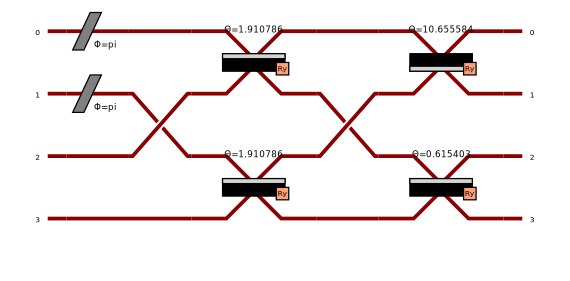

In [121]:
from perceval.rendering.circuit import SymbSkin, PhysSkin
perceval.pdisplay(circ, skin=PhysSkin())

In [122]:
states = {
    pcvl.BasicState([0, 0, 1, 1]): "00",
    pcvl.BasicState([0, 1, 1, 1]): "01",
    pcvl.BasicState([1, 0, 1, 1]): "10",
    pcvl.BasicState([1, 1, 1, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(processor, states)

truth_table = {"00": "00", "01": "01", "10": "10", "11": "11"}
ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(
    f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,1,0
11,0,0,0,1


performance = 0.07404999713832858, fidelity = 0.9999999530494814


In [93]:
sq3 = np.sqrt(3+np.sqrt(6))
sq3neg = np.sqrt(3-np.sqrt(6))

M = pcvl.Matrix([[-1/3, -np.sqrt(2)/3,  np.sqrt(2)/3,  2/3],
                 [np.sqrt(2)/3,-1/3,-2/3,np.sqrt(2)/3],
                 [-sq3/3,sq3neg/3,-sq3/np.sqrt(2)/3,sq3neg/(3*np.sqrt(2))],
                 [-sq3neg/3,-sq3/3,-sq3neg/(3*np.sqrt(2)),-sq3/np.sqrt(2)/3]])

In [94]:
c1 = comp.Unitary(U=M)

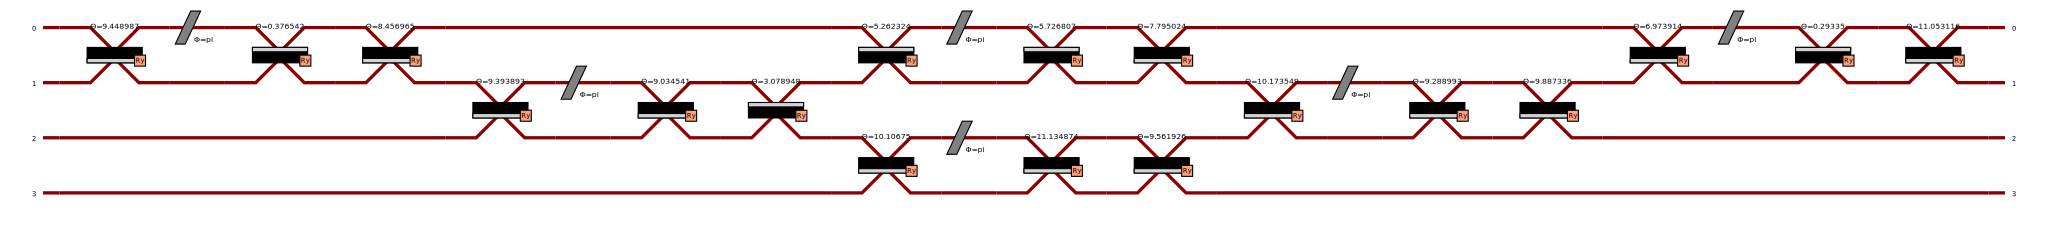

In [114]:
ub = pcvl.Circuit(2, name="ub") // comp.BS.Ry(theta = pcvl.Parameter("x_1")) // (0, comp.PS(phi=np.pi)) // comp.BS.Ry(theta = pcvl.Parameter("x_2")) // comp.BS.Ry(theta = pcvl.Parameter("x_3")) 
c2 = pcvl.Circuit.decomposition(M, ub,shape="triangle")
c2.describe()
pcvl.pdisplay(c2)

In [115]:
from perceval.utils.algorithms.simplification import simplify

simplified_c = simplify(c2, display = False)

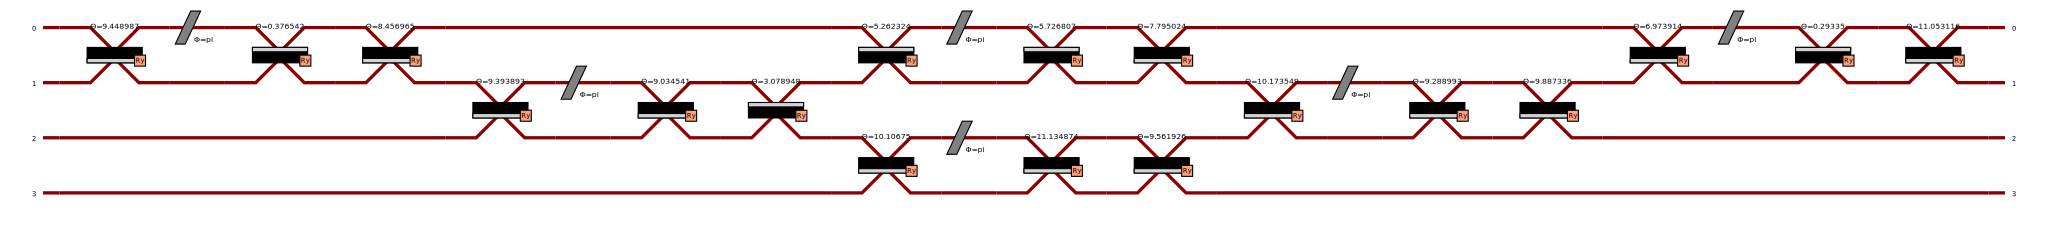

In [116]:
pcvl.pdisplay(simplified_c)

In [117]:
p = pcvl.Processor("SLOS",4)
p.set_circuit(c2)
p.set_postselection(pcvl.PostSelect("[2]==1 & [3]==1"))

In [118]:
states = {
    pcvl.BasicState([0, 0, 1, 1]): "00",
    pcvl.BasicState([0, 1, 1, 1]): "01",
    pcvl.BasicState([1, 0, 1, 1]): "10",
    pcvl.BasicState([1, 1, 1, 1]): "11"
}

cap = pcvl.algorithm.Analyzer(p, states)

truth_table = {"00": "00", "01": "01", "10": "10", "11": "11"}
cap.compute(expected=truth_table)

pcvl.pdisplay(cap)
print(
    f"performance = {cap.performance}, fidelity = {cap.fidelity.real}")

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,1,0
11,0,0,0,1


performance = 0.07407407400206312, fidelity = 1.0
